In [2]:
import symbolicAnalysis
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import chordModel
import numpy as np
from commonUtils import loadFileList

def printChordStat(kind, statistics):
    print kind, ": ", statistics.beatsNumber, '(', statistics.beatsPercent, '%) beats, ', statistics.durationSeconds, \
        '(', statistics.durationPercent, '%) sec'

os.chdir(os.environ['JAZZ_HARMONY_DATA_ROOT'] + "/JazzHarmonyCorpus")
#symStatistics, topTwoGrams, topNGrams, matrix = symbolicAnalysis.estimateStatistics(loadFileList('ready.txt'), top=100, maxNGram=20)
symStatistics, topTwoGrams, topNGrams, matrix = symbolicAnalysis.estimateStatistics(['annotations/airegin.json'], top=100, maxNGram=20)

printChordStat("maj", symStatistics.chordSummaryDict["maj"])
printChordStat("min", symStatistics.chordSummaryDict["min"])
printChordStat("dom", symStatistics.chordSummaryDict["dom"])
printChordStat("hdim7", symStatistics.chordSummaryDict["hdim7"])
printChordStat("dim", symStatistics.chordSummaryDict["dim"])

print "\nTop unclassified:", symStatistics.unclassifiedLabelsCounter.most_common(100)
print "\nAverage harmonic rhythm (beats per chord): ", symStatistics.meanHarmonicRhythm
print "Average tempo (bpm): ", symStatistics.meanBPM
print "N of [merged] segments: ", symStatistics.numberOfSegments
print "N of distinct N-gram counted: ", symStatistics.numberOfDistinctNGrams
print "Max N-gram length within top " + str(100) + ": ", symStatistics.maxNGramLengthWithinTop

annotations/airegin.json
maj ['min-m3-maj', 'dom-P4-maj'] Counter({'dom-P4-min': 50, 'min-P4-dom': 30, 'dom-P4-maj': 24, 'min-P5-dom': 24, 'maj-m2-min': 20, 'hdim7-P4-dom': 14, 'min-P1-dom': 12, 'min-m3-maj': 10, 'maj-M7-hdim7': 9, 'dom-P4-hdim7': 5, 'maj-P1-min': 5, 'min-m7-min': 4, 'min-P5-min': 4, 'min-M2-min': 4, 'min-P4-min': 2, 'min-P1-min': 1, 'dom-M2-min': 1})
min ['min-m7-min', 'min-P5-min', 'min-M2-min', 'maj-m2-min', 'min-P1-min', 'dom-P4-min', 'dom-M2-min', 'min-P4-min', 'maj-P1-min'] Counter({'dom-P4-min': 50, 'min-P4-dom': 30, 'dom-P4-maj': 24, 'min-P5-dom': 24, 'maj-m2-min': 20, 'hdim7-P4-dom': 14, 'min-P1-dom': 12, 'min-m3-maj': 10, 'maj-M7-hdim7': 9, 'dom-P4-hdim7': 5, 'maj-P1-min': 5, 'min-m7-min': 4, 'min-P5-min': 4, 'min-M2-min': 4, 'min-P4-min': 2, 'min-P1-min': 1, 'dom-M2-min': 1})
dom ['hdim7-P4-dom', 'min-P5-dom', 'min-P4-dom', 'min-P1-dom'] Counter({'dom-P4-min': 50, 'min-P4-dom': 30, 'dom-P4-maj': 24, 'min-P5-dom': 24, 'maj-m2-min': 20, 'hdim7-P4-dom': 14, 'mi

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Top 100 2-grams

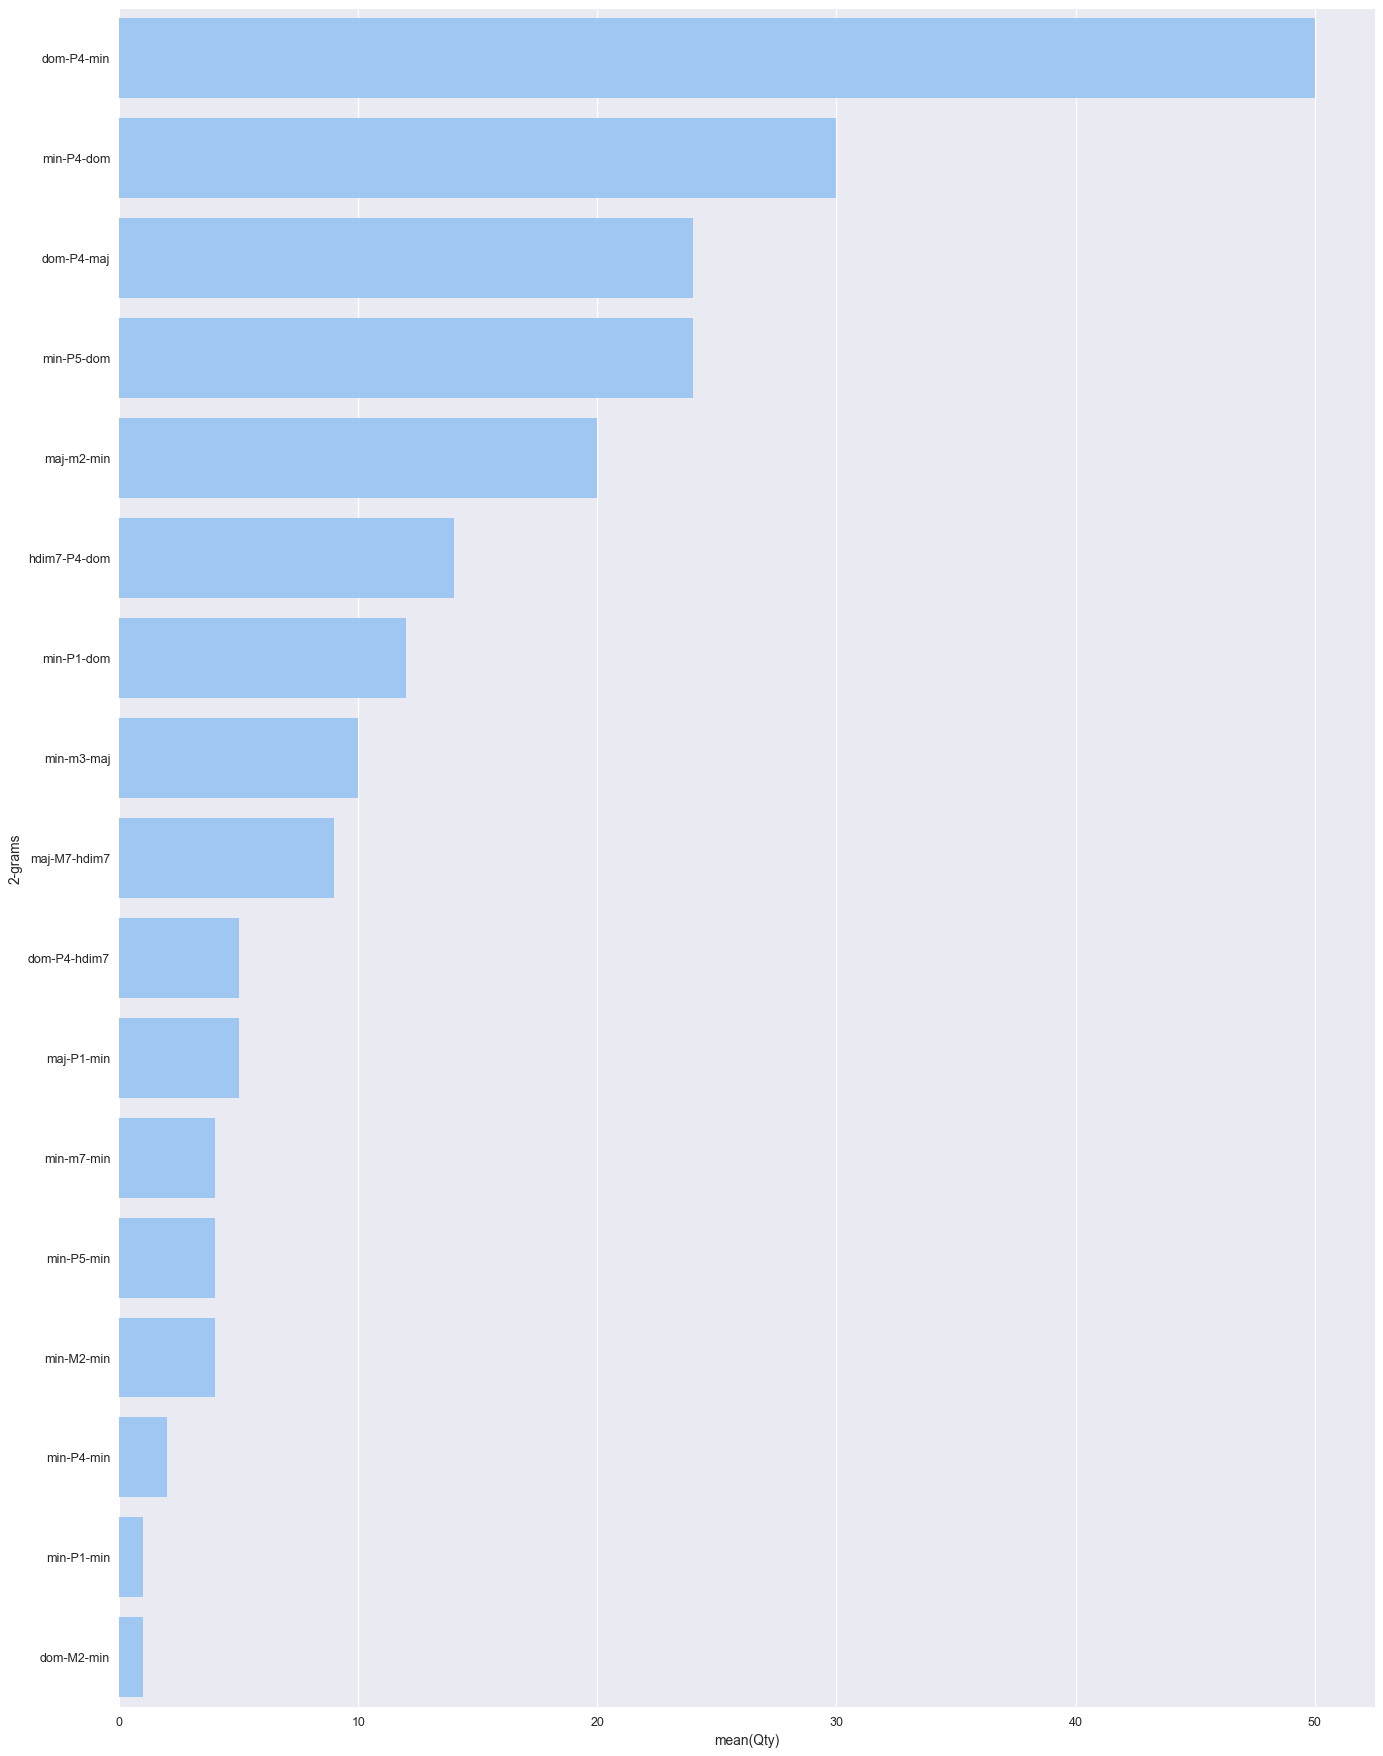

In [4]:
twoGramsFrame = pd.DataFrame({'2-grams': [x[0] for x in topTwoGrams], 'Qty': [x[1] for x in topTwoGrams]})
fig=plt.figure(figsize=(18, 25), dpi= 90, facecolor='w', edgecolor='k')
#f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot("Qty", y="2-grams", data=twoGramsFrame, color="b")
plt.show()

# Top 100 N-grams

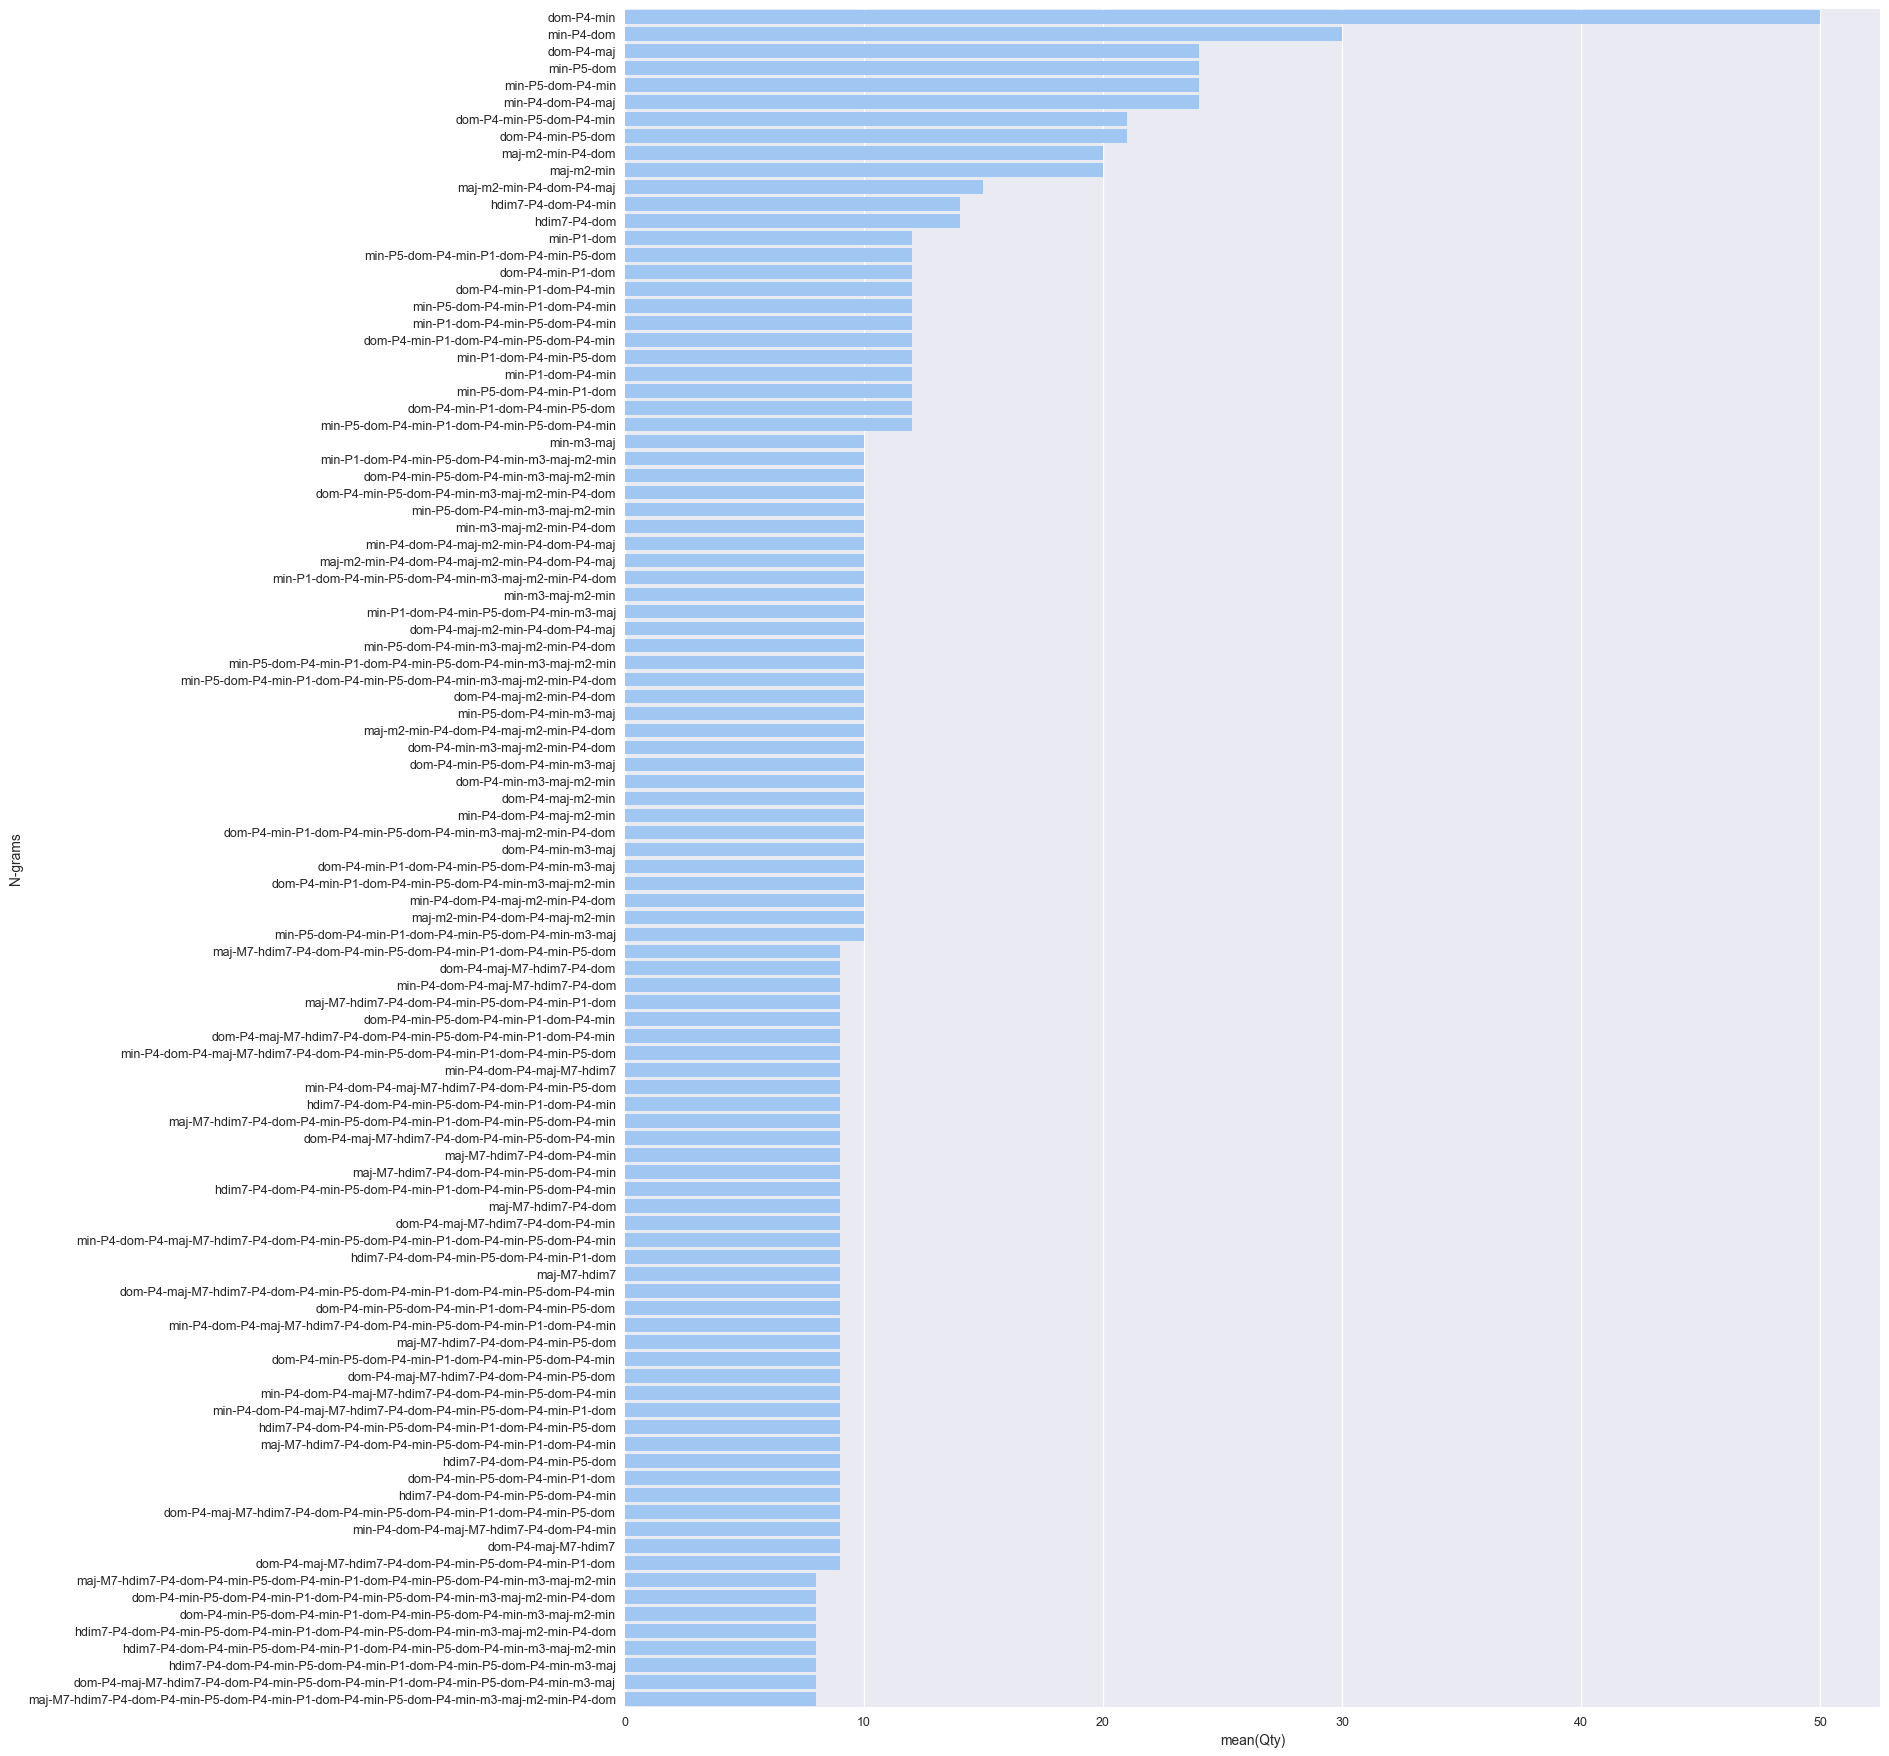

In [5]:
nGramsFrame = pd.DataFrame({'N-grams': [x[0] for x in topNGrams], 'Qty': [x[1] for x in topNGrams]})
fig=plt.figure(figsize=(18, 25), dpi= 90, facecolor='w', edgecolor='k')
#f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot("Qty", y="N-grams", data=nGramsFrame, color="b")
plt.show()

# [log]Transition matrix

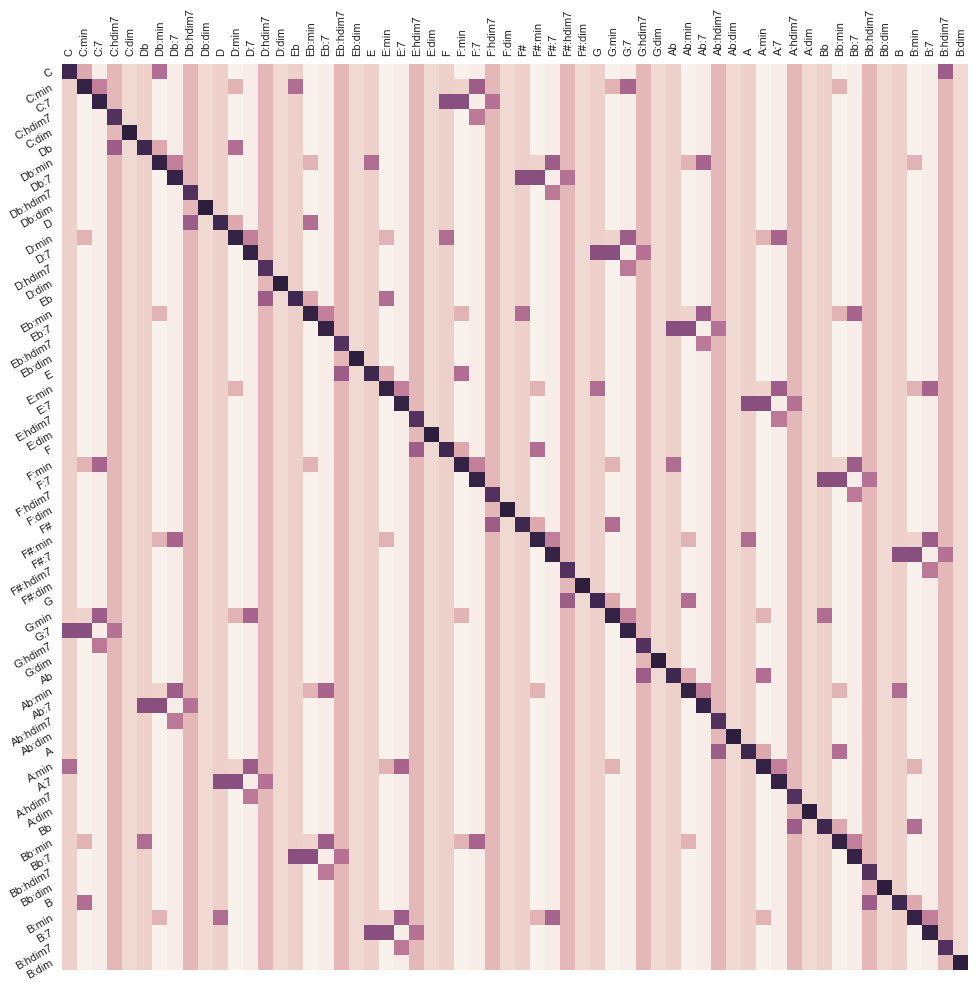

In [6]:
fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.heatmap(np.log(matrix), cbar=False, square=True)
ax.set_xticklabels(labels=chordModel.CHORD_NAMES, rotation=90)
ax.set_yticklabels(labels=np.flip(chordModel.CHORD_NAMES, 0), rotation=30)
ax.xaxis.tick_top()

plt.show()